In [77]:
import xml.etree.ElementTree as ET
import pandas as pd
import dateutil.parser as dp
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

filename = 'D:/Downloads/activity_9966229070.tcx'

In [78]:
tree = ET.parse(filename)
root = tree.getroot()

#Print out elements
for x in root:
    print(x)

<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Activities' at 0x000002039080A040>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Author' at 0x0000020394C8D1D0>


In [79]:
print('Move through elements by index')
print('Activities')
for x in root[0]:
    print(x)


Move through elements by index
Activities
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Activity' at 0x000002039080A4A0>


In [80]:
print('First activity')
for x in root[0][0]:
    print(x)


First activity
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Id' at 0x000002039080A4F0>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x000002039080A630>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203911ABE00>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203914534A0>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203916E5DB0>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x000002039140AF40>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203911E1C70>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203949C3720>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x0000020394C08950>
<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Creator' at 0x0000020394C8AEA0>


In [81]:
print('Get values for lap #1')
for child in root[0][0][1]:
    print(child.tag, child.text)

Get values for lap #1
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}TotalTimeSeconds 624.686
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}DistanceMeters 1609.34
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}MaximumSpeed 2.8929998874664307
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Calories 136
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}AverageHeartRateBpm 
          
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}MaximumHeartRateBpm 
          
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Intensity Active
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}TriggerMethod Manual
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Track 
          
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Extensions 
          


In [82]:
#For heart rates they are saved in a "Value" tag for some reason so:
print('Average heart rate for lap #1:')
AHR = root[0][0][1][4][0]
print(AHR.tag, AHR.text)

Average heart rate for lap #1:
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Value 137


In [83]:
#There is a better way to keep track of variables than by index number
print('Search by tag name')
run = root[0][0]
print(run.findall('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap'))

Search by tag name
[<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x000002039080A630>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203911ABE00>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203914534A0>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203916E5DB0>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x000002039140AF40>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203911E1C70>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203949C3720>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x0000020394C08950>]


In [84]:
#You could iterate through all the laps and trackpoints
for lap in run.findall('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap'):
    for trackpoint in lap[8].findall('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Trackpoint'):
        for child in trackpoint:
            print(child.tag, child.text)

{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Time 2022-11-12T23:22:55.000Z
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position 
              
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}AltitudeMeters 131.1999969482422
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}DistanceMeters 1.7200000286102295
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}HeartRateBpm 
              
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Extensions 
              
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Time 2022-11-12T23:22:56.000Z
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Position 
              
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}AltitudeMeters 131.1999969482422
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}DistanceMeters 3.940000057220459
{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}HeartRateBpm 
              
{http://www.

In [85]:
#Namespace to clean it up:
NAMESPACES = {
    'ns': 'http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2',
    'ns2': 'http://www.garmin.com/xmlschemas/UserProfile/v2',
    'ns3': 'http://www.garmin.com/xmlschemas/ActivityExtension/v2',
    'ns4': 'http://www.garmin.com/xmlschemas/ProfileExtension/v1',
    'ns5': 'http://www.garmin.com/xmlschemas/ActivityGoals/v1'
}

print('Old way:', run.findall('{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap'))

print('New way:', run.findall('ns:Lap', NAMESPACES))

Old way: [<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x000002039080A630>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203911ABE00>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203914534A0>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203916E5DB0>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x000002039140AF40>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203911E1C70>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x00000203949C3720>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x0000020394C08950>]
New way: [<Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x000002039080A630>, <Element '{http://www.garmin.com/xmlschemas/TrainingCenterDatabase/v2}Lap' at 0x000002039

In [86]:
# The good data is in Trackpoints but we have to navigate to those
# run -> Lap -> Track -> Trackpoint

# For example, print the heart rate from the first trackpoint in each lap
# find() returns the first, findall() returns a list of all elements with that tag
for lap in run.findall('ns:Lap', NAMESPACES):
    print(lap.find('ns:Track', NAMESPACES).find('ns:Trackpoint', NAMESPACES).find('ns:HeartRateBpm', NAMESPACES)[0].text)

100
147
160
162
161
170
164
168


In [87]:
# Make a dataframe with all the trackpoint data
data_list = []
for lap_number, lap in enumerate(run.findall('ns:Lap', NAMESPACES)):
    for tp in lap.find('ns:Track', NAMESPACES).findall('ns:Trackpoint', NAMESPACES):
        data = {}
        data['Time'] = dp.parse(tp.find('ns:Time', NAMESPACES).text)
        data['Latitude'] = float(tp.find('ns:Position', NAMESPACES)[0].text)
        data['Longitude'] = float(tp.find('ns:Position', NAMESPACES)[1].text)
        data['Elevation'] = round(float(tp.find('ns:AltitudeMeters', NAMESPACES).text), 4)
        data['Distance'] = round(float(tp.find('ns:DistanceMeters', NAMESPACES).text), 2)
        data['Heart_rate'] = int(tp.find('ns:HeartRateBpm', NAMESPACES)[0].text)
        data['Speed'] = round(float(tp.find('ns:Extensions', NAMESPACES)[0][0].text), 3)
        data['Cadence'] = int(tp.find('ns:Extensions', NAMESPACES)[0][1].text)*2 #Cadence is recorded in Garmin as half the number most people use
        data['Lap'] = lap_number+1
        data_list.append(data)

df = pd.DataFrame(data_list)
print(df)

                          Time   Latitude  Longitude  Elevation  Distance  \
0    2022-11-12 23:22:55+00:00  30.247196 -97.730168      131.2      1.72   
1    2022-11-12 23:22:56+00:00  30.247210 -97.730184      131.2      3.94   
2    2022-11-12 23:22:57+00:00  30.247221 -97.730200      131.2      5.86   
3    2022-11-12 23:22:58+00:00  30.247235 -97.730218      131.2      8.13   
4    2022-11-12 23:22:59+00:00  30.247246 -97.730236      131.6     10.21   
...                        ...        ...        ...        ...       ...   
4091 2022-11-13 00:30:59+00:00  30.246551 -97.730160      132.2  11571.06   
4092 2022-11-13 00:31:00+00:00  30.246510 -97.730150      132.0  11575.30   
4093 2022-11-13 00:31:01+00:00  30.246481 -97.730136      132.0  11578.65   
4094 2022-11-13 00:31:02+00:00  30.246459 -97.730125      132.0  11581.26   
4095 2022-11-13 00:31:03+00:00  30.246470 -97.730089      131.2  11584.53   

      Heart_rate  Speed  Cadence  Lap  
0            100  1.166      108   

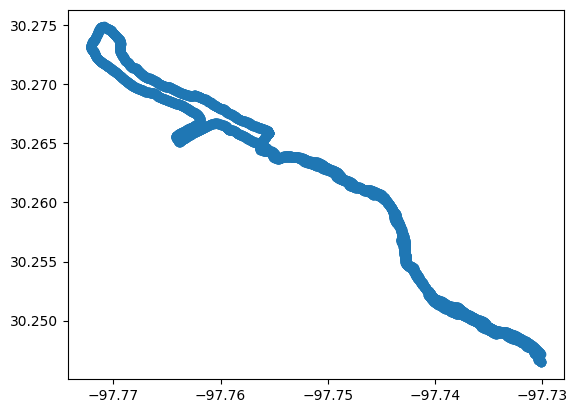

In [88]:
plt.scatter(df['Longitude'], df['Latitude'])

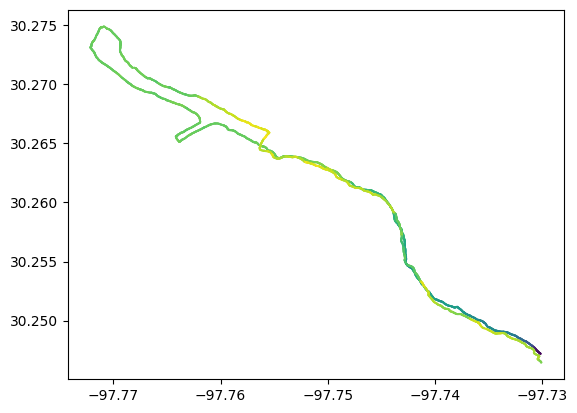

In [89]:
plt.scatter(df['Longitude'], df['Latitude'], c=df['Heart_rate'], marker='.', s=1)
# df2 = df[::25]
# plt.scatter(df2['Longitude'], df2['Latitude'], c=df2['Heart_rate'], marker='.', s=(df2['Cadence']-min(df2['Cadence']))/max(df2['Cadence'])**3*15000505)

Text(0, 0.5, 'Heart Rate (BPM)')

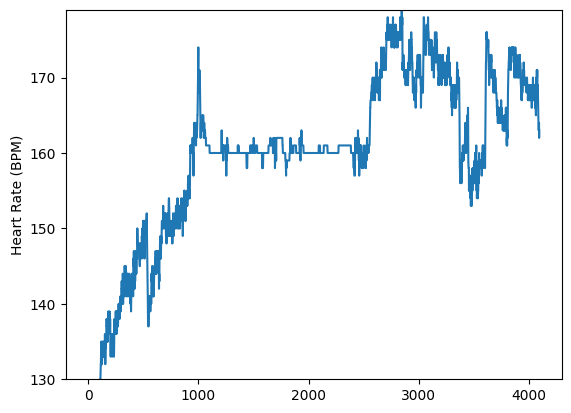

In [90]:
#Adjust y-axis scale so you can see better
plt.plot(df['Heart_rate'])
plt.ylim((130, max(df['Heart_rate'])))
plt.ylabel('Heart Rate (BPM)')

Text(0, 0.5, 'Heart Rate (BPM)')

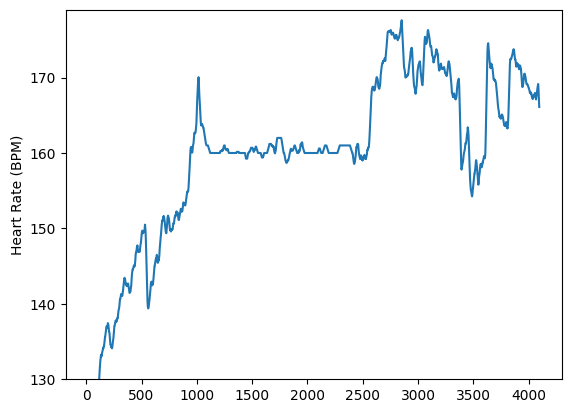

In [91]:
#Smooth it out with moving average
df['HR_smooth'] = df['Heart_rate'].rolling(20).mean()
plt.plot(df['HR_smooth'])
plt.ylim((130,max(df['Heart_rate'])))
plt.ylabel('Heart Rate (BPM)')

Text(0.5, 0, 'Distance Traveled (miles)')

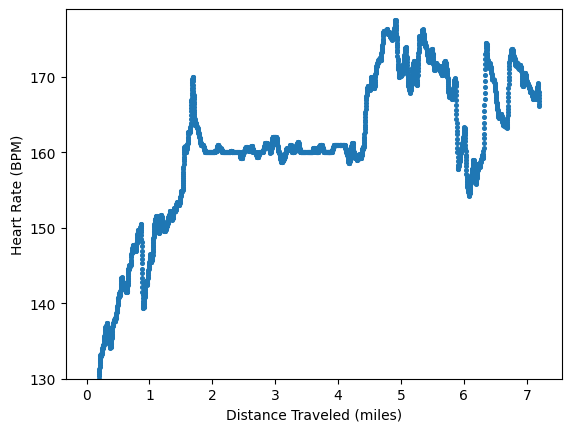

In [92]:
#Put distance in miles on the x-axis
df['Distance_miles'] = df['Distance']/1609.34
plt.scatter(df['Distance_miles'], df['HR_smooth'], s=7)
plt.ylim((130,max(df['Heart_rate'])))
plt.ylabel('Heart Rate (BPM)')
plt.xlabel('Distance Traveled (miles)')

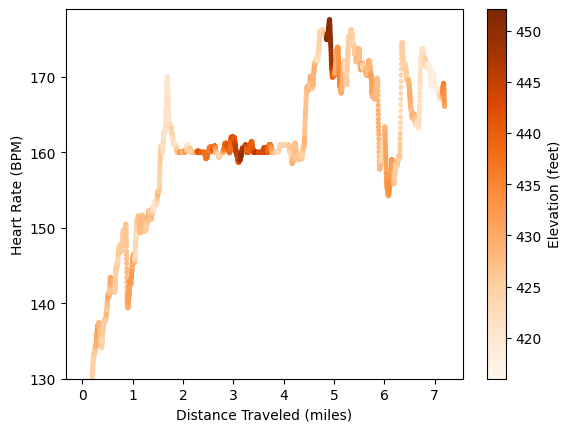

In [94]:
#Color points by Elevation
df['Elevation_feet'] = df['Elevation']*3.2808
plt.scatter(df['Distance_miles'], df['HR_smooth'], c=df['Elevation_feet'], cmap='Oranges', s=7)
plt.ylim((130,max(df['Heart_rate'])))
plt.ylabel('Heart Rate (BPM)')
plt.xlabel('Distance Traveled (miles)')
plt.colorbar(label='Elevation (feet)')

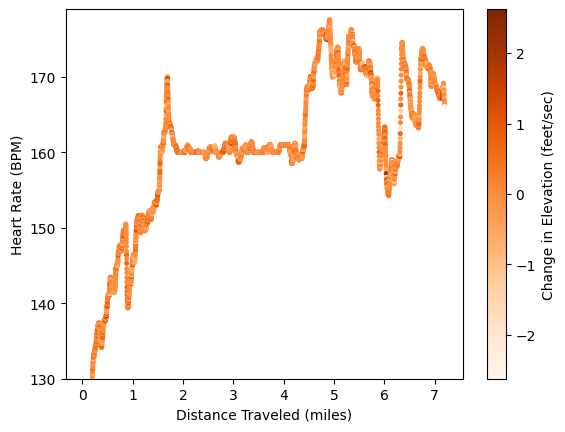

In [95]:
#Look at change in elevation a.k.a. derivative of elevation, slope, climb, etc.
df['dElevation'] = df['Elevation_feet'].diff()
plt.scatter(df['Distance_miles'], df['HR_smooth'], c=df['dElevation'], cmap='Oranges', s=7)
plt.ylim((130,max(df['Heart_rate'])))
plt.ylabel('Heart Rate (BPM)')
plt.xlabel('Distance Traveled (miles)')
plt.colorbar(label='Change in Elevation (feet/sec)')

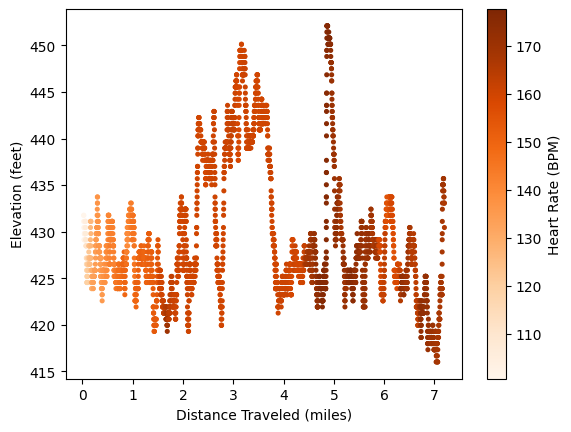

In [96]:
#Swap HR and Elevation
plt.scatter(df['Distance_miles'], df['Elevation_feet'], c=df['HR_smooth'], cmap='Oranges', s=7)
# plt.ylim((130,max(df['Heart_rate'])))
plt.ylabel('Elevation (feet)')
plt.xlabel('Distance Traveled (miles)')
plt.colorbar(label='Heart Rate (BPM)')

In [113]:
timestamp = dt.now().strftime("%m-%d-%Y_%H%M%S")

outfile = filename[:-4] + '_' + timestamp + '.csv'
df.to_csv(outfile)

D:/Downloads/activity_9966229070_11-20-2022_082632.csv
